# Обробка Природної Мови (Natural Language Processing, NLP)

Велика кількість даних у багатьох реальних наборах даних представлена у вигляді вільного тексту (free text) 
(коментарі користувачів, а також будь-які «неструктуровані» поля).

(Обчислювальна) обробка природної мови: ми пишемо комп'ютерні програми, які можуть 
розуміти природну мову.

Ця лекція: ми спробуємо отримати деяку значущу інформацію з неструктурованих текстових даних.

## Основи обробки тексту

Обробка тексту є важливим етапом підготовки текстових даних для завдань обробки природної мови (NLP). Вона передбачає перетворення необробленого тексту в структурований формат, який може ефективно використовуватися моделями машинного навчання.

**Очищення тексту**

- Переведення в нижній регістр: перетворює всі символи в тексті в нижній регістр для забезпечення однорідності.
- Видалення розділових знаків: видаляє розділові знаки, які не впливають на значення тексту.
- Видалення стоп-слів: видаляє часто вживані слова (наприклад, «і», «є», «в»), які не несуть значущого значення.
- Видалення спеціальних символів і цифр: видаляє спеціальні символи і цифри, які часто не мають значення для текстового аналізу.

In [1]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download the necessary resources
nltk.download('stopwords')
nltk.download('punkt')

def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove special characters
    text = re.sub(r'[^a-z\s]', '', text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in word_tokenize(text) if word not in stop_words)

    return text

sample_text = "Hello! This is an example text with numbers 123 and punctuation!!!"
cleaned_text = clean_text(sample_text)
print(cleaned_text)  # Output: hello example text numbers


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\first\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\first\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


hello example text numbers punctuation


**Токенізація (tokenization)**

Токенізація — це процес розбиття тексту на менші одиниці, зазвичай слова або речення. Вона допомагає розбивати текстові дані на зручні для подальшої обробки частини.

- Токенізація слів: розбиває текст на окремі слова.
- Токенізація речень: розбиває текст на речення.

In [2]:
from nltk.tokenize import word_tokenize, sent_tokenize

def tokenize_text(text):
    
    # Word tokenization
    words = word_tokenize(text)

    # Sentence tokenization
    sentences = sent_tokenize(text)

    return words, sentences

sample_text = "Natural Language Processing (NLP) is exciting! It enables computers to understand human language."
words, sentences = tokenize_text(sample_text)
print("Words:", words)
print("Sentences:", sentences)

Words: ['Natural', 'Language', 'Processing', '(', 'NLP', ')', 'is', 'exciting', '!', 'It', 'enables', 'computers', 'to', 'understand', 'human', 'language', '.']
Sentences: ['Natural Language Processing (NLP) is exciting!', 'It enables computers to understand human language.']


**Стемінг та лематизація (Stemming and Lemmatization)**

- Стемінг: скорочує слова до їхньої базової або кореневої форми шляхом видалення суфіксів (наприклад, «running» стає «run»). Стемінг може призвести до появи слів, яких немає в словнику.

- Лематизація: скорочує слова до їхньої основи або форми, що є в словнику (лема), з урахуванням контексту (наприклад, «running» стає «run», але «better» стає «good»).

In [3]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

# Download the necessary resources
nltk.download('punkt')
nltk.download('wordnet')

def apply_stemming(text):
    stemmer = PorterStemmer()

    # Tokenize text into words
    words = word_tokenize(text)

    # Apply stemming
    stemmed_words = [stemmer.stem(word) for word in words]

    return stemmed_words

def apply_lemmatization(text):
    lemmatizer = WordNetLemmatizer()

    # Tokenize text into words
    words = word_tokenize(text)

    # Apply lemmatization
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    return lemmatized_words

sample_text = "The children are playing with their toys."
stemmed_words = apply_stemming(sample_text)
lemmatized_words = apply_lemmatization(sample_text)
print("Stemmed Words:", stemmed_words)  # Output: ['the', 'children', 'are', 'play', 'with', 'their', 'toy']
print("Lemmatized Words:", lemmatized_words)  # Output: ['the', 'child', 'are', 'playing', 'with', 'their', 'toy']

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\first\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\first\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Stemmed Words: ['the', 'children', 'are', 'play', 'with', 'their', 'toy', '.']
Lemmatized Words: ['The', 'child', 'are', 'playing', 'with', 'their', 'toy', '.']


**Методи нормалізації**

Методи нормалізації стандартизують текстові дані, перетворюючи їх у єдиний формат. Це може включати:

- Обробка синонімів: перетворення синонімів у загальне представлення (наприклад, «автомобіль» і «машина» стають «автомобілем»).
- Обробка абревіатур: розширення абревіатур до повної форми (наприклад, «u» стає «you»).
- Виправлення орфографічних помилок: виправлення слів з орфографічними помилками.

In [4]:
from nltk.tokenize import word_tokenize
from autocorrect import Speller

# Download necessary resources
nltk.download('punkt')

def normalize_text(text):
    # Initialize spell checker
    spell = Speller(lang='en')

    # Define a dictionary for common abbreviations
    normalization_dict = {
        "u": "you",
        "ur": "your",
        "r": "are",
        "pls": "please",
        "pos": "please",
        "thx": "thanks"
    }

    # Tokenize text into words
    words = word_tokenize(text.lower())

    # Handle abbreviations, spelling corrections, and remove special characters
    normalized_words = [normalization_dict.get(word, spell(word)) for word in words]

    # Reconstruct the text
    normalized_text = ' '.join(normalized_words)

    # Clean special characters after spelling corrections
    normalized_text = normalized_text.replace('!', '').replace('.', '').strip()

    return normalized_text

sample_text = "U r the best! Pls help me with this assignment. Thx!"
normalized_text = normalize_text(sample_text)
print(normalized_text)

you are the best  please help me with this assignment  thanks


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\first\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Основи НЛП

Розуміння мови є складним завданням

Кілька потенційних дерев розбору: «Під час полювання в Африці я застрелив слона в піжамі. Як він потрапив у мою піжаму, я не знаю».

Основна думка: ми використовуємо неймовірну кількість контексту, щоб зрозуміти значення речень природної мови.

*Але чи завжди це складно?*

Дві рецензії на фільм:

"Barbie is a fun movie that has surprisingly plenty of **heartwarming** moments and **good** messages to offer. The set designs are **eye-catching** and on point as well. Both Margot Robbie and Ryan Gosling nailed their parts, but it is Gosling who mostly shines."

"It didn't grab me; I didn't find it funny anywhere. It went from the most **annoying** opening to as far as one can get annoying in every second of this film. The music was **shallow**; the production design teetered on Terry Gilliam's work but without the imagination or talent, and old 1920s/1930s film backgrounds and old Three Stooges routines were very **tiring**."

Який з них є позитивним?

Часто ми можемо дуже легко визначити «загальний зміст» тексту природною мовою, навіть не розуміючи речень.

Обробка природної мови для науки про дані

- Представлення тексту у вигляді вектора (чисел)
- Вимірювання відстані (або схожості) між векторами
- Мовні моделі

### Модель "мішок слів" (Bag of words model)

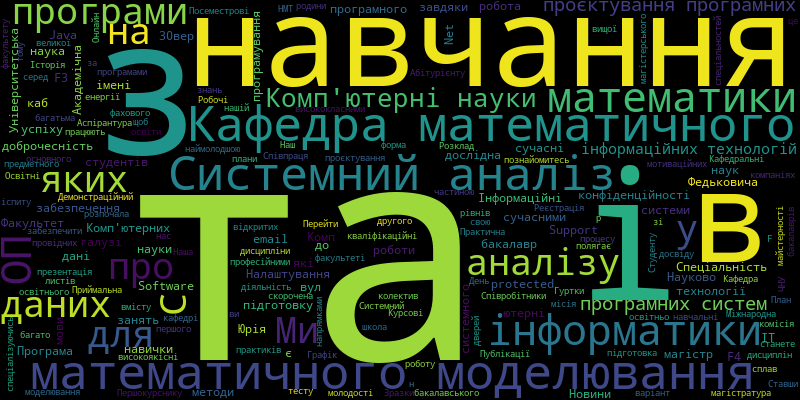

In [ ]:
from wordcloud import WordCloud
from bs4 import BeautifulSoup
import requests
import re

response = requests.get("https://mathmod.chnu.edu.ua/")
root = BeautifulSoup(response.content, "lxml")

wc = WordCloud(width=800,height=400).generate(re.sub(r"\s+"," ", root.text))
wc.to_image()

## TFIDF

«Частота терміна» просто означає кількість кожного слова в документі. Позначається $tf_{i,j}$
 частотою слова $i$
 в документі $j$
 (іноді індекси обертаються, ми використовуємо їх для узгодженості з матрицею).

Часто (як на попередньому слайді) це просто означає кількість, але є й інші можливості.

In [6]:
documents = [
    "In Inception, the plot unfolds with thrilling action, keeping audiences on edge through a series of intense and unexpected twists.", # t_i_0 = 1
    "The story of Inception keeps audiences hooked with its thrilling action and surprising twists, making every moment unforgettable.", # t_i_1 = 1
    "The Matrix transformation preserves the vector's direction, illustrating how linear combinations affect the overall system." # t_i_2 = 0
]

document_words = [doc.lower().split() for doc in documents] # add stemming, etc.
vocab = sorted(set(sum(document_words, [])))
vocab_dict = {k:i for i,k in enumerate(vocab)}
print(vocab, "\n")
print(vocab_dict, "\n")

['a', 'action', 'action,', 'affect', 'and', 'audiences', 'combinations', 'direction,', 'edge', 'every', 'hooked', 'how', 'illustrating', 'in', 'inception', 'inception,', 'intense', 'its', 'keeping', 'keeps', 'linear', 'making', 'matrix', 'moment', 'of', 'on', 'overall', 'plot', 'preserves', 'series', 'story', 'surprising', 'system.', 'the', 'thrilling', 'through', 'transformation', 'twists,', 'twists.', 'unexpected', 'unfolds', 'unforgettable.', "vector's", 'with'] 

{'a': 0, 'action': 1, 'action,': 2, 'affect': 3, 'and': 4, 'audiences': 5, 'combinations': 6, 'direction,': 7, 'edge': 8, 'every': 9, 'hooked': 10, 'how': 11, 'illustrating': 12, 'in': 13, 'inception': 14, 'inception,': 15, 'intense': 16, 'its': 17, 'keeping': 18, 'keeps': 19, 'linear': 20, 'making': 21, 'matrix': 22, 'moment': 23, 'of': 24, 'on': 25, 'overall': 26, 'plot': 27, 'preserves': 28, 'series': 29, 'story': 30, 'surprising': 31, 'system.': 32, 'the': 33, 'thrilling': 34, 'through': 35, 'transformation': 36, 'twis

Тепер побудуємо матрицю, яка містить кількість слів (частоту вживання термінів) для всіх документів.

In [7]:
import numpy as np

X_tf = np.zeros((len(documents), len(vocab)), dtype=int)
for i, doc in enumerate(document_words):
    for word in doc:
        X_tf[i, vocab_dict[word]] +=1
        
print(X_tf)

[[1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1
  0 0 1 1 1 0 0 1]
 [0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0
  0 1 0 0 0 1 0 1]
 [0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 3 0 0
  1 0 0 0 0 0 1 0]]


**Зворотна частота документа**

Частота вживання термінів, як правило, «перевантажена» дуже поширеними словами («the», «is», «of» тощо). Примітка: дуже поширені слова, які називаються «стоп-словами», можуть бути навіть видалені.

Ідея зворотної частоти документа полягає в тому, щоб надавати словам негативну вагу пропорційно до частоти їх вживання в усьому наборі документів.

$$idf_{i} = \log( \frac{N_{documents}}{N_{documents-with-word-i}} )$$

Як і у випадку з частотою терміна, існують також інші версії з різними масштабами, але найпоширенішим є вищезазначений логарифмічний масштаб.

Зверніть увагу, що обернена частота документа визначається лише для слів, а не для пар «слово-документ», як у випадку з частотою терміна.

In [8]:
idf = np.log(X_tf.shape[0]/X_tf.astype(bool).sum(axis=0))
print(idf)

[1.09861229 1.09861229 1.09861229 1.09861229 0.40546511 0.40546511
 1.09861229 1.09861229 1.09861229 1.09861229 1.09861229 1.09861229
 1.09861229 1.09861229 1.09861229 1.09861229 1.09861229 1.09861229
 1.09861229 1.09861229 1.09861229 1.09861229 1.09861229 1.09861229
 0.40546511 1.09861229 1.09861229 1.09861229 1.09861229 1.09861229
 1.09861229 1.09861229 1.09861229 0.         0.40546511 1.09861229
 1.09861229 1.09861229 1.09861229 1.09861229 1.09861229 1.09861229
 1.09861229 0.40546511]


### TFIDF

Term frequency inverse document frequency $=tf_{i,j} \times idf_{i}$

(Частота входження помножена на зворотну частоту)


In [9]:
X_tfidf = X_tf * idf
print(X_tfidf)

[[1.09861229 0.         1.09861229 0.         0.40546511 0.40546511
  0.         0.         1.09861229 0.         0.         0.
  0.         1.09861229 0.         1.09861229 1.09861229 0.
  1.09861229 0.         0.         0.         0.         0.
  0.40546511 1.09861229 0.         1.09861229 0.         1.09861229
  0.         0.         0.         0.         0.40546511 1.09861229
  0.         0.         1.09861229 1.09861229 1.09861229 0.
  0.         0.40546511]
 [0.         1.09861229 0.         0.         0.40546511 0.40546511
  0.         0.         0.         1.09861229 1.09861229 0.
  0.         0.         1.09861229 0.         0.         1.09861229
  0.         1.09861229 0.         1.09861229 0.         1.09861229
  0.40546511 0.         0.         0.         0.         0.
  1.09861229 1.09861229 0.         0.         0.40546511 0.
  0.         1.09861229 0.         0.         0.         1.09861229
  0.         0.40546511]
 [0.         0.         0.         1.09861229 0.      

### Косинусна подібність (Cosine Similarity)

$$CosineSim(x, y) = \frac{x*y}{||x||_{2}||y||_{2}}$$

Більші числа означають, що тексти подібніші між собою.

In [10]:
X_tfidf_norm = X_tfidf / np.linalg.norm(X_tfidf, axis=1)[:,None]
M = X_tfidf_norm @ X_tfidf_norm.T
print(M)

[[1.         0.04991504 0.        ]
 [0.04991504 1.         0.        ]
 [0.         0.         1.        ]]


### Недоліки TFIDF

Відсутність поняття подібності у векторному просторі частотності термінів

$$||kyiv - zhytomyr|| = ||zhytomyr - uncle|| = 1 $$

Очевидно, що деякі слова більше споріднені, ніж інші.

## Word Embeddings та word2vec

Щоб розпочати роботу з вбудовуванням слів, зазначимо, що слова в моделі частоти термінів також можна розглядати як представлені векторами; зокрема, будь-яке слово представлене вектором «one-hot», який має нуль у всіх координатах, крім одиниці в зазначеній координаті

Ця дискусія підводить нас до теми «вбудовування слів». Як і одноразове кодування слів, вбудовування слів є векторним представленням слів у певному просторі $R^{k}$ ($k\approx 100,300$, openai: $k \approx 1500$). Тобто для кожного слова в кодері вбудовування слів представляє це слово k-вимірним вектором. Однак є кілька важливих відмінностей:

In [1]:
# import gensim as gs
# from gensim.test.utils import lee_corpus_list
# from gensim.models import Word2Vec
# import numpy as np
import gensim.downloader as api

# model = Word2Vec(lee_corpus_list, vector_size=24, epochs=100)
# model["pittsburgh"][:10]

word_vectors = api.load("glove-wiki-gigaword-100")
vector = word_vectors['computer']

print(vector, '\n')
print(word_vectors.similarity('woman', 'man'), '\n')
print(word_vectors.distance("media", "media"), '\n')

[-1.6298e-01  3.0141e-01  5.7978e-01  6.6548e-02  4.5835e-01 -1.5329e-01
  4.3258e-01 -8.9215e-01  5.7747e-01  3.6375e-01  5.6524e-01 -5.6281e-01
  3.5659e-01 -3.6096e-01 -9.9662e-02  5.2753e-01  3.8839e-01  9.6185e-01
  1.8841e-01  3.0741e-01 -8.7842e-01 -3.2442e-01  1.1202e+00  7.5126e-02
  4.2661e-01 -6.0651e-01 -1.3893e-01  4.7862e-02 -4.5158e-01  9.3723e-02
  1.7463e-01  1.0962e+00 -1.0044e+00  6.3889e-02  3.8002e-01  2.1109e-01
 -6.6247e-01 -4.0736e-01  8.9442e-01 -6.0974e-01 -1.8577e-01 -1.9913e-01
 -6.9226e-01 -3.1806e-01 -7.8565e-01  2.3831e-01  1.2992e-01  8.7721e-02
  4.3205e-01 -2.2662e-01  3.1549e-01 -3.1748e-01 -2.4632e-03  1.6615e-01
  4.2358e-01 -1.8087e+00 -3.6699e-01  2.3949e-01  2.5458e+00  3.6111e-01
  3.9486e-02  4.8607e-01 -3.6974e-01  5.7282e-02 -4.9317e-01  2.2765e-01
  7.9966e-01  2.1428e-01  6.9811e-01  1.1262e+00 -1.3526e-01  7.1972e-01
 -9.9605e-04 -2.6842e-01 -8.3038e-01  2.1780e-01  3.4355e-01  3.7731e-01
 -4.0251e-01  3.3124e-01  1.2576e+00 -2.7196e-01 -8

In [2]:
import gensim as gs
from gensim.test.utils import lee_corpus_list
from gensim.models import Word2Vec
import numpy as np

In [3]:
# TFIDF in Gensim

documents = [
    "kyiv has some excellent new restaurants",
    "kharkiv is a city with great cuisine",
    "postgresql is a relational database management system"
]
document_words = [doc.split() for doc in documents]
dictionary = gs.corpora.Dictionary(document_words)
corpus = [dictionary.doc2bow(doc) for doc in document_words]
tfidf = gs.models.TfidfModel(corpus)
X_tfidf = gs.matutils.corpus2csc(tfidf[corpus])
print(X_tfidf.todense().T)

M = gs.similarities.MatrixSimilarity(tfidf[corpus])
print(M.get_similarities(tfidf[corpus]))

[[0.40824829 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.16073254 0.43550663 0.43550663 0.43550663 0.16073254 0.43550663
  0.43550663 0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.16073254 0.         0.         0.         0.16073254 0.
  0.         0.43550663 0.43550663 0.43550663 0.43550663 0.43550663]]
[[1.        0.        0.       ]
 [0.        1.        0.0516699]
 [0.        0.0516699 1.       ]]


![nlp](../resources/nlp-1.png)

In [ ]:
king = word_vectors['king']
man = word_vectors['man']
woman = word_vectors['woman']

# Perform the arithmetic: king - man + woman
result_vector = king - man + woman

# Find the most similar words to the resulting vector
similar_words = word_vectors.similar_by_vector(result_vector, topn=5)

for word, similarity in similar_words:
    print(f"{word}: {similarity:.3f}")

## Лінгвістичні моделі та n-грами (Language models and n-grams)

Хоча модель «мішок слів» є напрочуд ефективною, вона явно відкидає 
багато інформації про текст

Терміни *«нудний фільм і не дуже хороший»* у кінорецензії не є тим самим, що *«дуже хороший фільм і не нудний»*, але вони мають абсолютно однакове представлення в «мішку слів»

Щоб вийти за межі цього, ми хотіли б побудувати більш точну модель того, як слова 
насправді пов'язані між собою: мовну модель

(Імовірнісна) мовна модель має на меті надати розподіл ймовірностей 
для кожного слова, враховуючи всі слова, що йдуть перед ним

$$P(word_{i}|word_{1},...,word_{i-1})$$

“Data science is the study and practice of how we can extract insight and 
knowledge from large amounts of”

$$P(word_{i}="data"|word_{1},...,word_{i-1})$$
$$P(word_{i}="penguins"|word_{1},...,word_{i-1})$$